# Normalisation et filtres

Dans ce Notebook, nous allons explorer la normalisation et les filtres d'images.

Commençons par charger et visualiser une image.

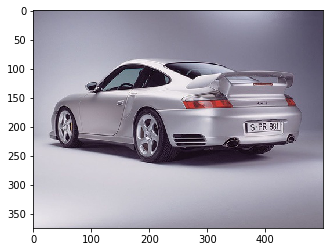

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image

# Required magic to display matplotlib plots in notebooks
%matplotlib inline 


# Load the image from the source file (using imread)
image_file = "voc/automobile/000142.jpg"
img = mp_image.imread(image_file)

# Display it using plt
plt.imshow(img)
plt.show()

## Normalisation de l'image

Examinons la distribution des valeurs des pixels dans l'image. Idéalement, l'image devrait avoir une distribution de valeurs relativement régulière, indiquant un bon contraste et facilitant l'extraction d'informations analytiques.

Un moyen facile de vérifier cela est de tracer un histogramme.

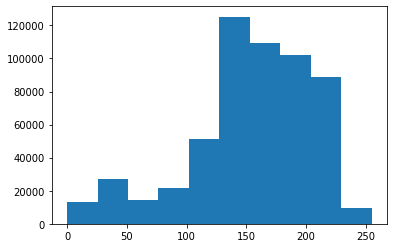

In [3]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions 
plt.hist(img.ravel())
#show plot
plt.show()

Une autre façon utile de visualiser les statistiques d'une image est le tracé de l'hisogramme cumulé à travers la fonction de distribution cumulative (CDF). Ce graphique permet de montrer les fréquences d'intensité cumulée des pixels de 0 à 255.

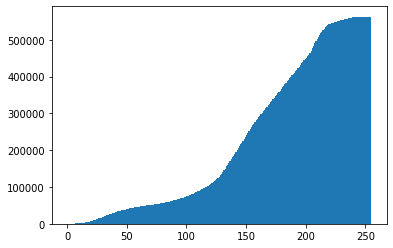

In [5]:
# use hist, ravel, bins = 255, and the cumulative parameter to True
plt.hist(img.ravel(), bins=255, cumulative=True)
#show plot
plt.show()

L'histogramme et la CFD de notre image montrent une distribution assez inégale - il y a beaucoup de contraste dans l'image. Idéalement, nous devrions égaliser les valeurs dans les images que nous voulons analyser pour essayer de rendre nos images plus cohérentes en termes de formes qu'elles contiennent, indépendamment des niveaux de lumière.

Une façon simple de le faire est d'appliquer une technique appelée *étirement du contraste* (contrast stretching), dans laquelle les valeurs des pixels sont redimensionnées pour s'assurer que toutes les valeurs comprises entre un centile très bas et très haut (généralement le 2ème centile et le 98ème centile) sont mises en correspondance avec la plage de 0 à 255 - en fait, on "étire" l'histogramme pour essayer de s'assurer que la distribution couvre toute la gamme des valeurs possibles.
*L'égalisation de l'histogramme* (Histogram equalization) est une opération plus complexe qui crée une distribution plus uniforme. 

Le code dans la cellule ci-dessous utilise les méthodes **exposure.rescale_intensity** et **exposure.equalize_hist** du paquet **skimage** pour effectuer l'étirement du contraste et l'égalisation de l'histogramme.


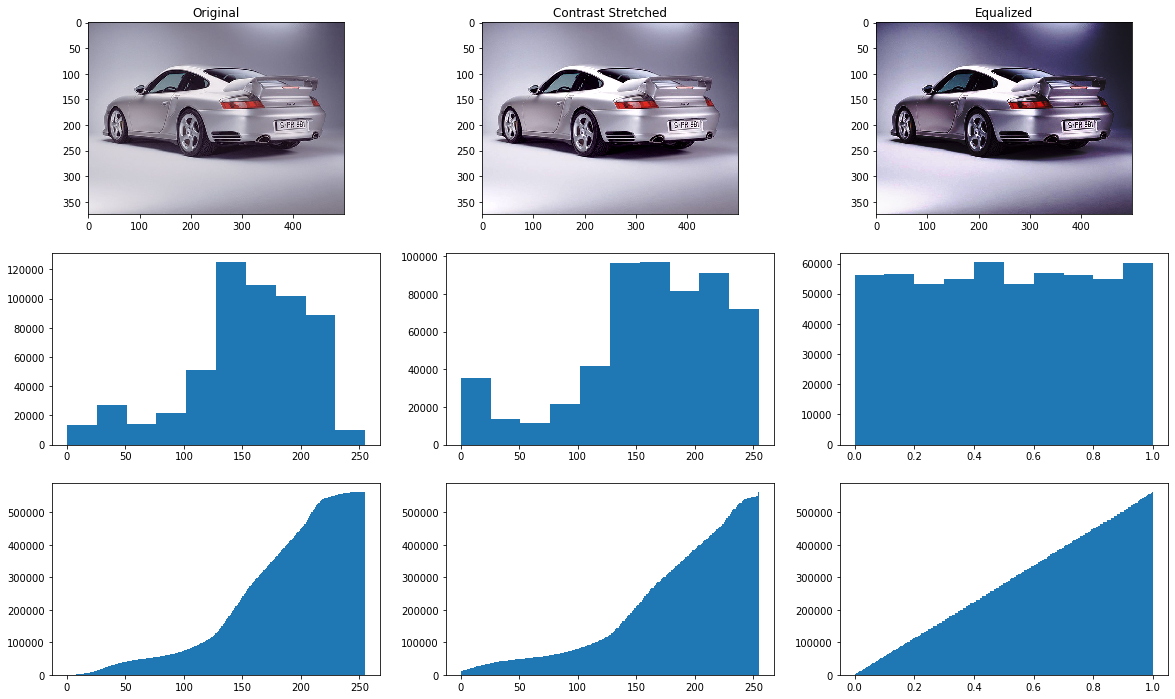

In [9]:
from skimage import exposure
import numpy as np

# Contrast stretching between the percentiles 2 and 98 
# get the pixel value of the second percentile (using np.percentile(IMAGE, NBRth))
p2 = np.percentile(img, 2)
# get the pixel value of the 98th percentile
p98 = np.percentile(img, 98)

# calculate the contrast stretched image, rescale the intensity of the image using the range from 
# ..the 2nd to the 98th percentiles (using exposure.rescale_intensity)
image_ct = exposure.rescale_intensity(img, in_range=(p2, p98)) 

# Histogram Equalization (using exposure.equalize_hist)
image_eq = exposure.equalize_hist(img) 

# Show the images
fig = plt.figure(figsize=(20, 12)) 

# subplot the three images in the first line, the three histograms in the second line 
# .. & and the three cumulative histograms in th third line of the figure

# Subplot for original image
a=fig.add_subplot(3,3,1)
imgplot = plt.imshow(img)
a.set_title('Original')

# Subplot for contrast stretched image image_ct
a=fig.add_subplot(3,3,2)
imgplot = plt.imshow(image_ct)
a.set_title('Contrast Stretched')

# Subplot for equalized image image_eq
a=fig.add_subplot(3,3,3)
imgplot = plt.imshow(image_eq)
a.set_title('Equalized')

# Subplots for histograms
a=fig.add_subplot(3,3,4)
# image histogram (using hist & ravel)
imgplot = plt.hist(img.ravel())

a=fig.add_subplot(3,3,5) 
# image_ct histogram (using hist & ravel)
imgplot = plt.hist(image_ct.ravel())

a=fig.add_subplot(3,3,6)
# image_eq histogram (using hist & ravel)
imgplot = plt.hist(image_eq.ravel())

# Subplots for cumulative histograms CDFs (using hist, bins=255 & cumulative = True)

a=fig.add_subplot(3,3,7)
imgplot = plt.hist(img.ravel(), bins=255, cumulative=True)

a=fig.add_subplot(3,3,8)
imgplot = plt.hist(image_ct.ravel(), bins=255, cumulative=True)

a=fig.add_subplot(3,3,9)
imgplot = plt.hist(image_eq.ravel(), bins=255, cumulative=True)

# show plot
plt.show()

As you can see, contrast stretching results in a histogram of mroe or less the same shape, but spread out over the full range of pixel values. The CDF is slightly smoother than for the original image. Histogram equalization has produced a much more even distribution of pixel values, and a more or less perfectly diagonal CDF; but the image itself is noticable less natural looking.

These kind of contrast enhancements can be useful when images have low contrast. They're particularly useful in medical imaging scenarios, for example to enhance X-rays. They can also be used to counteract contrast variance in a set of images that will be used to train  amachine learning model.

## Filters

Filters are implemented by defining numeric grids, called *kernels* that are convolved across an image to change the value of the pixel in the middle of the grid by calculating a weighted sum of the surrounding pixels, using the values in the kernel as weights. In practice they are used to apply visual enhancement effects to the image; such as sharpening, blurring, and so on. This can often be used to remove "noise" from an image, such as is common in photgraphs taken in low-light conditions.

Let's take a look at some common filters in the **PIL.ImageFilter** library:

<Figure size 1152x864 with 0 Axes>

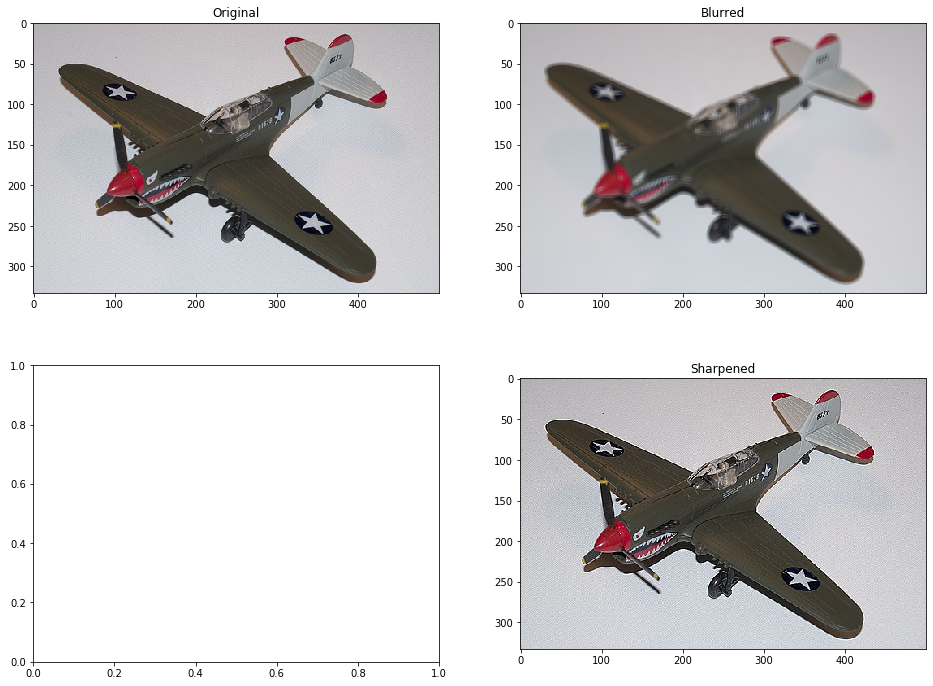

In [32]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

# Load the image plane/002279.jpg from the source file (using pillow image and )
image_file = "voc/plane/002279.jpg"
image = Image.open(image_file)

# applying the blur filter to the image (using image.filter)
blurred_image = image.filter(ImageFilter.BLUR) 

# applying the sharpen filter to the image (using image.filter)
sharpened_image = image.filter(ImageFilter.SHARPEN)

# Display the three images in one line
fig = plt.figure(figsize=(16, 12))
fig, ((ax1,ax2),(ax3,ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot original image

ax1.imshow(image)
ax1.set_title("Original")

# Plot blurred image
#...
#...
#...
ax2.imshow(blurred_image)
ax2.set_title("Blurred")

# Plot sharpened image
#...
#...
#...
ax3.imshow(sharpened_image)
ax3.set_title("Sharpened")

#show plot
plt.show()

Since a filter kernel is just a grid of numbers, you can create your own filters as numpy arrays, like this:

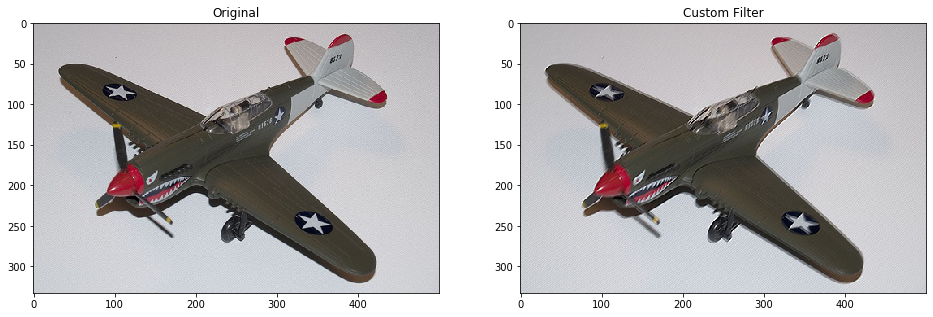

In [37]:
# creating a custom kernel

my_kernel = (200, 50, -100,
             -50, 200, -50,
            -100, 50, 200)

# you can try other custom filters

# applying the custom filter to the image (using filter & ImageFilter.Kernel...)
#filtered_image = #...
filtered_image = image.filter(ImageFilter.Kernel((3,3), my_kernel)) 
# applying the edge filter to the image (using filter & ImageFilter.FIND_EDGES...)
#edges_image = #...
edges_image = image.filter(ImageFilter.FIND_EDGES) 


# Display the two images (image and filtered image in one line of the figure)
fig = plt.figure(figsize=(16, 12))

# Plot original image
#...
#...
#...
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot filtered image
#...
#...
#...
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(filtered_image)
a.set_title("Custom Filter")

#show plot
plt.show()

### Detecting Edges

One particular use of filters is to detect the edges of objects in an image. PIL includes a FIND_EDGES filter for this purpose:

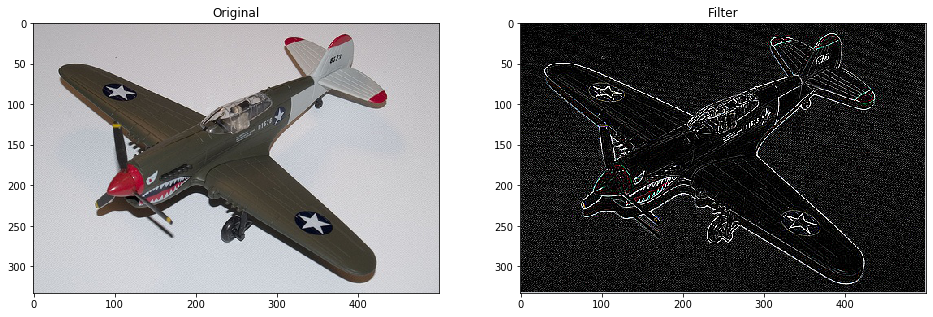

In [39]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

# Load the image plane/002279.jpg from the source file (using pillow)
#...
#...
image_file = "voc/plane/002279.jpg"
image = Image.open(image_file)

# applying the edge filter to the image (using filter & ImageFilter.FIND_EDGES...)
#...
edges_image = image.filter(ImageFilter.FIND_EDGES) 


# Display the original image and the filtered image
fig = plt.figure(figsize=(16, 12))

# Plot original image
#...
#...
#...
b=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(image)
b.set_title("Original")

# Plot filtered image
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(edges_image)
a.set_title("Filter")

#show plot
plt.show()

If the built-in FIND-EDGES filter doesn't provide what you need, you could use a Sobel edge-detection algorithm; which involves convolving two filters across an image to find the horizontal and vertical vector gradients for each pixel, and then calculating the magnitude (length) of each vector gradient:

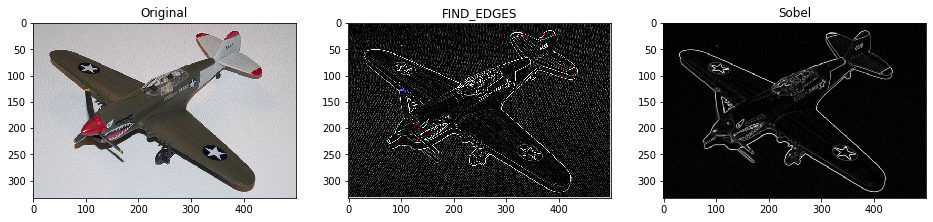

In [42]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    
    # Convert color image to gray scale (using skimage rgb2gray)
    img = sc.rgb2gray(image)
    # horizontal derivative (using ndimage.sobel)
    dx = ndimage.sobel(img, 1) 
    
    # vertical derivative (using ndimage.sobel)
    dy = ndimage.sobel(img, 0) 
    
    # magnitude (using numpy hypot)
    mag = np.hypot(dx, dy)
    # normalize (Q&D)
    mag *= 255.0 / np.amax(mag)  
    mag = mag.astype(np.uint8)
    return mag

# call the function to apply your sobel edge to the image (you should pass the image as a numpy array to the function)
sobel_image = edge_sobel(np.array(image))

# Display the three images (original, pillow find edge & sobel filtered)
fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot PIL FIND_EDGES image
#...
#...
#...
a=fig.add_subplot(1,3,2)
image_plot_2 = plt.imshow(edges_image)
a.set_title("FIND_EDGES")

# Plot Sobel image (You Need to use a gray color map as you converted this to a grayscale image)
#...
a=fig.add_subplot(1, 3, 3)
image_plot_3 = plt.imshow(sobel_image, cmap="gray")

# Need to use a gray color map as we converted this to a grayscale image
a.set_title("Sobel")

#show plot
plt.show()